### <font color="#00bfff">④決定木で重要な値の算出</font>

In [1]:
"""ライブラリのインポート
"""
import pandas as pd

In [2]:
"""データの読み込み
"""
data=pd.read_csv('train.csv')

#### <font color="#FFD700">各カラムの意味</font>

| <font color="8EF1FF"> カラム名 </font>  | <font color="8EF1FF"> 意味  </font> |
|:-----------|:------------|
| PassengerId  | 乗客のID |
| Survived   | 生存フラグ（0=死亡、1=生存） |
| Pclass   | チケットクラス |
| Name   | 乗客の名前 |
| Sex   | 性別（male=男性、female＝女性） |
| SibSp     | 兄弟/配偶者の数 |
| parch    | 親/子供の数 |
| ticket    | チケット番号 |
| fare    | 料金 |
| cabin     | 客室番号 |
| Embarked     | 出港地（タイタニックへ乗った港） |


<span style="font-size: 15px; color: #8EF1FF;">pclass=チケットクラス</span><br>
<span style="font-size: 12px;">
1 = 上層クラス（お金持ち）<br>
2 = 中級クラス（一般階級）<br>
3 = 下層クラス（労働階級）</span>


<span style="font-size: 15px; color: #8EF1FF;">Embarked = 出港地（タイタニックへ乗った港）</span><br>
<span style="font-size: 12px;">
C = Cherbourg（フランス）<br>
Q = Queenstown（アイルランド）<br>
S = Southampton（イングランド）</span>


### ●基本統計量

In [3]:
"""dataの基本統計量
"""
data.describe()

#Age(年齢)・Cabin(客室番号)・Embarked(出港地)に欠損値あり
#外れ値なし

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### ●Sex(性別)のダミー変数化
<p style="text-indent:2em">male=0　female=1　に置換</p>

In [4]:
"""ダミー変数化
"""
data["Sex"][data["Sex"]=='male']=0
data["Sex"][data["Sex"]=='female']=1

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### ●Age(年齢)の欠損値の補完

In [5]:
"""欠損値を平均値で補完
"""
data["Age"][data["Age"].isnull()]=data["Age"].mean()

#今回は平均値で埋めるが、実務ではニューラルネットを使い予測値で埋めることが一般的

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### ●データの分割

In [6]:
#説明変数(Pclass,Sex,Age,SibSp,Parch,Fare)
X=data.iloc[0:,[2,4,5,6,7,9]]
#目的変数(Survived)
y=data.iloc[0:,[1]]

"""訓練データとテストデータに分割(7:3)
"""
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

### ●決定木

In [7]:
"""基本モデルの作成
"""
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=3)

In [8]:
"""y_train,y_testを一次元に変換
"""
y_train=y_train.values.flatten()
y_test=y_test.values.flatten()

In [9]:
"""モデルの最適化
"""
#説明変数:X_train    目的変数:y_train
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
"""graphviz(グラフ作成用のツール)のインストール
"""
!pip install graphviz
!pip install pydotplus

You should consider upgrading via the 'c:\users\aika\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\aika\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


In [11]:
"""graphviz,pydotplusのインポート
"""
from sklearn.tree import export_graphviz
import pydotplus

In [12]:
"""データの可視化
"""
variables=["Pclass","Sex","Age","SibSp","Parch","Fare"]
dot_data=tree.export_graphviz(
    clf,
    out_file=None,#ファイル名
    filled=True,#色を塗る
    feature_names=X.columns,#特徴量(説明変数の名前)
    class_names=['survived', 'unsurvived']#目的変数の分類名
)

graph=pydotplus.graph_from_dot_data(dot_data)

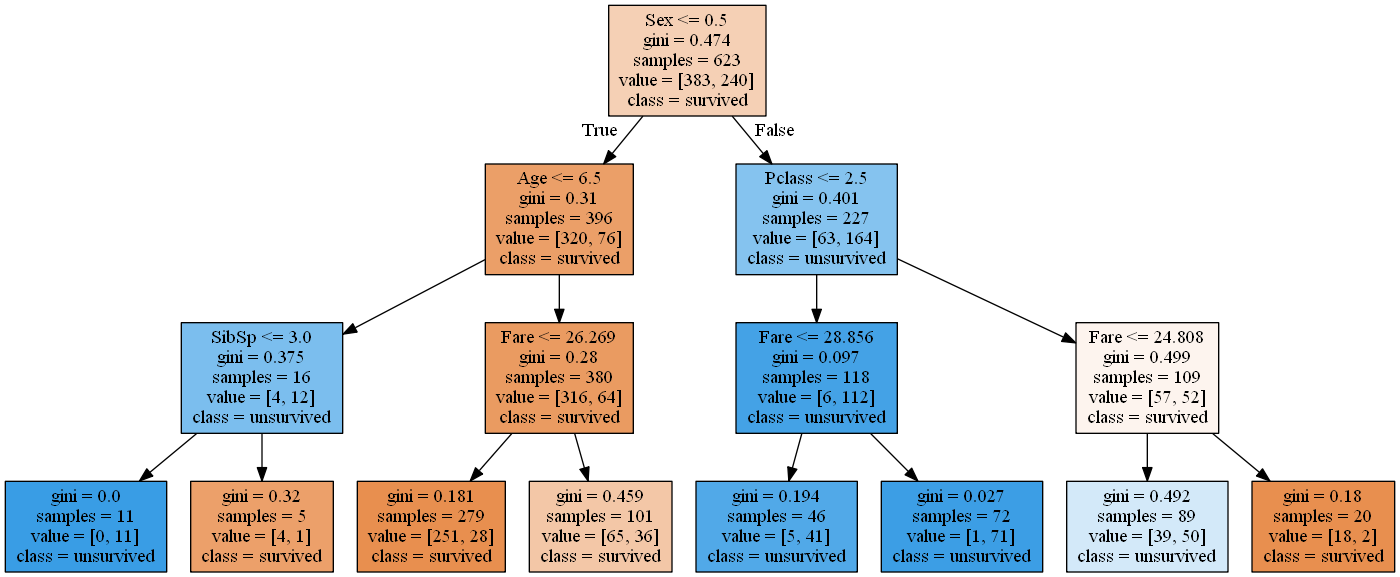

In [13]:
"""表示
"""
from IPython.display import Image
Image(graph.create_png())

### ●結果

Sexが最も影響度が高い値である

### ●性別ごとの生存数を棒グラフで表示

In [14]:
"""ライブラリのインストール
"""
! pip install seaborn

You should consider upgrading via the 'c:\users\aika\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


In [15]:
"""ライブラリのインポート
"""
import seaborn as sns
from matplotlib import pyplot as plt

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


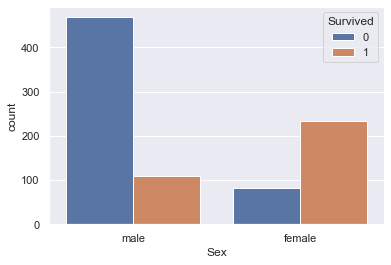

In [16]:
"""性別ごとの生存数
"""

#0が男性　1が女性
sns.set(style='darkgrid')
data["Sex"][data["Sex"]==0]="male"
data["Sex"][data["Sex"]==1]="female"
#sns.barplot(data=data,x="Sex",y="Survived")
sns.countplot(data=data, x="Sex", hue="Survived")

#### <font color="#FFD700">女性の方が男性よりも生存率が高い</font>